<a href="https://colab.research.google.com/github/Aleena24/Predictive_Analysis/blob/main/Customer_Sales_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [11]:
df = pd.read_csv('/content/Retail.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# Preprocessing

Data Cleaning and Preparation



In [13]:
print(df.isnull().sum())
df = df.dropna(subset=['CustomerID'])
df = df.drop_duplicates()
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.head()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


Descriptive statistics

In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')
print(df['InvoiceDate'].isnull().sum())
df = df.dropna(subset=['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['InvoiceDate'].describe()

0


,InvoiceDate
count,392692
mean,2011-07-10 19:13:07.771892480
min,2010-12-01 08:26:00
25%,2011-04-07 11:12:00
50%,2011-07-31 12:02:00
75%,2011-10-20 12:53:00
max,2011-12-09 12:50:00


# Sales Analysis

Top 10 best-selling products by quantity

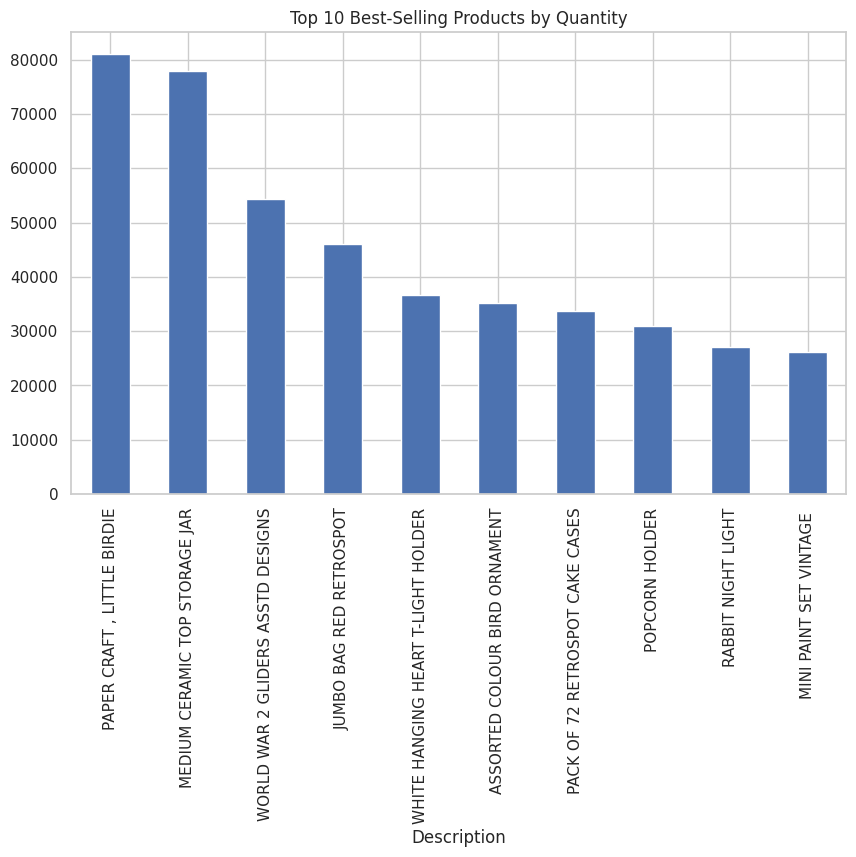

In [20]:
best_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

#Viz
best_selling_products.plot(kind='bar', figsize=(10,6), title="Top 10 Best-Selling Products by Quantity")
plt.show()

 Total revenue generated by each product

 displaying top 10 products

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalSales, dtype: float64


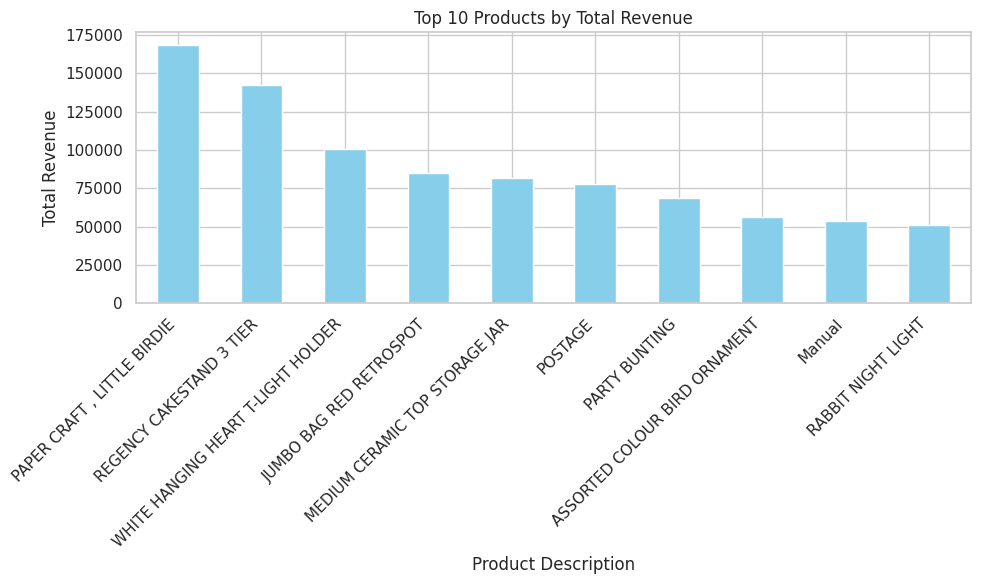

In [54]:
df['Total Revenue'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
print(product_revenue.head(10))

#viz
top_10_products = product_revenue.head(10)
plt.figure(figsize=(10,6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Total Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Product Description")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Monthly revenue trend

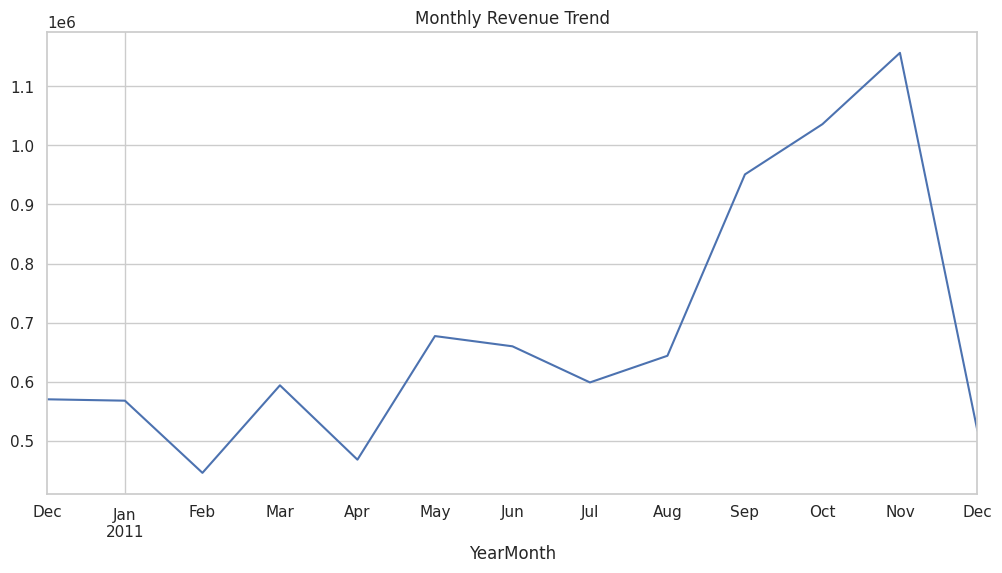

In [27]:
monthly_revenue = df.groupby('YearMonth')['TotalSales'].sum()

#viz
monthly_revenue.plot(kind='line', figsize=(12,6), title="Monthly Revenue Trend")
plt.show()


# Customer Behaviour

One-time customers and percentage of sales from repeat customers

Total number of customers: 4338
Number of one-time customers: 71
Number of repeat customers: 4267
Repeat customers account for 98.36% of total customers.


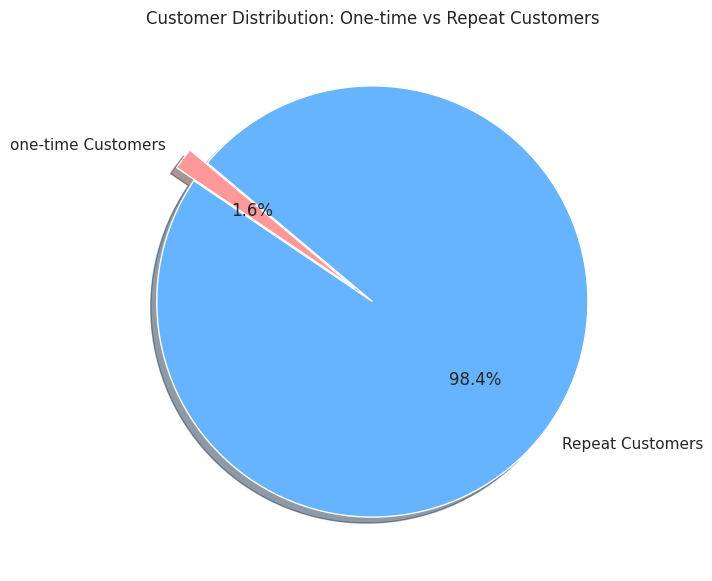

In [78]:
total_customers = df['CustomerID'].nunique()
customer_orders = df.groupby('CustomerID').size()
one_time_customers = customer_orders[customer_orders == 1].count()
repeat_customers = customer_orders[customer_orders > 1].count()

repeat_percentage = (repeat_customers / total_customers) * 100

print(f"Total number of customers: {total_customers}")
print(f"Number of one-time customers: {one_time_customers}")
print(f"Number of repeat customers: {repeat_customers}")
print(f"Repeat customers account for {repeat_percentage:.2f}% of total customers.")

#viz
labels = ['one-time Customers', 'Repeat Customers']
sizes = [one_time_customers, repeat_customers]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Customer Distribution: One-time vs Repeat Customers')
plt.show()


Average order value and variation across customer segments

In [ ]:
import matplotlib.pyplot as plt

# Calculate total sales per invoice
invoice_revenue = df.groupby('InvoiceNo')['TotalSales'].sum()

# Calculate the average order value
avg_order_value = invoice_revenue.mean()
print('Average order value (total sales per invoice):', avg_order_value)

# Calculate average sales per country
country_order_value = df.groupby('Country')['TotalSales'].mean().sort_values(ascending=False)

# Plot the average sales per country
plt.figure(figsize=(12,8))
country_order_value.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Average Order Value by Country', fontsize=16)
plt.ylabel('Average Order Value', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [79]:
invoice_revenue = df.groupby('InvoiceNo')['TotalSales'].sum()
avg_order_value = invoice_revenue.mean()
print('average order value (total sales per invoice) : ',avg_order_value)

country_order_value = df.groupby('Country')['TotalSales'].mean().sort_values(ascending=False)
print(country_order_value)


average order value (total sales per invoice) :  479.56016047917126
Country
Netherlands             121.003111
Australia               117.234386
Japan                   116.561900
Singapore                95.852658
Sweden                   85.261844
Denmark                  49.882474
Lithuania                47.458857
Lebanon                  37.641778
EIRE                     36.709446
Brazil                   35.737500
Norway                   33.767918
Czech Republic           33.069600
Finland                  32.913985
Greece                   32.831172
Bahrain                  32.258824
Switzerland              30.659397
Israel                   29.452408
United Arab Emirates     27.974706
Channel Islands          27.363507
Austria                  25.624824
Germany                  25.338327
France                   25.094200
Spain                    24.832013
Malta                    24.335625
Canada                   24.280662
Iceland                  23.681319
Italy         

Countries contributing most to sales revenue

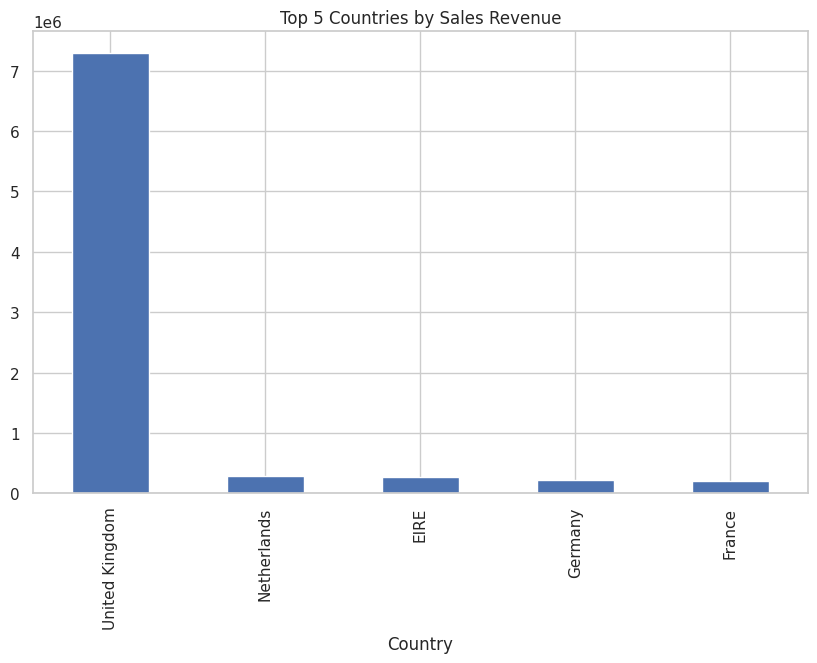

In [44]:
country_revenue = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

country_revenue.head(5).plot(kind='bar', figsize=(10,6), title="Top 5 Countries by Sales Revenue")
plt.show()


# Product Performance

Top 5 countries with the highest average revenue per transaction

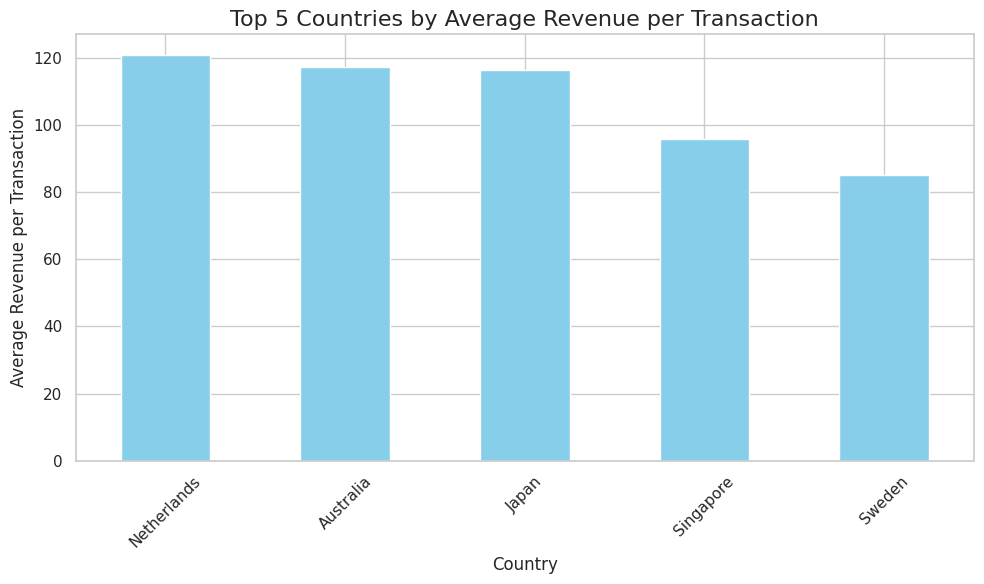

In [82]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
avg_revenue_per_transaction = df.groupby('Country')['TotalSales'].mean().sort_values(ascending=False)
top_5_countries = avg_revenue_per_transaction.head(5)

#viz
plt.figure(figsize=(10,6))
top_5_countries.plot(kind='bar', color='skyblue')

plt.title('Top 5 Countries by Average Revenue per Transaction', fontsize=16)
plt.ylabel('Average Revenue per Transaction', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

 products performance specific months or seasons

In [ ]:
# Group the data by StockCode and YearMonth, summing the TotalSales
product_performance_by_month = df.groupby(['StockCode', 'YearMonth'])['TotalSales'].sum().unstack().fillna(0)

# Plot a stacked bar chart
plt.figure(figsize=(12,8))

# Transpose the data for easier plotting of a stacked bar chart (months on x-axis)
product_performance_by_month.T.plot(kind='bar', stacked=True, figsize=(12,8), colormap='tab20')

# Add title and labels
plt.title('Product Performance Across Months (Stacked Bar)', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Month', fontsize=12)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend(title='Product Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-84-ce0f0fa6c4c5>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

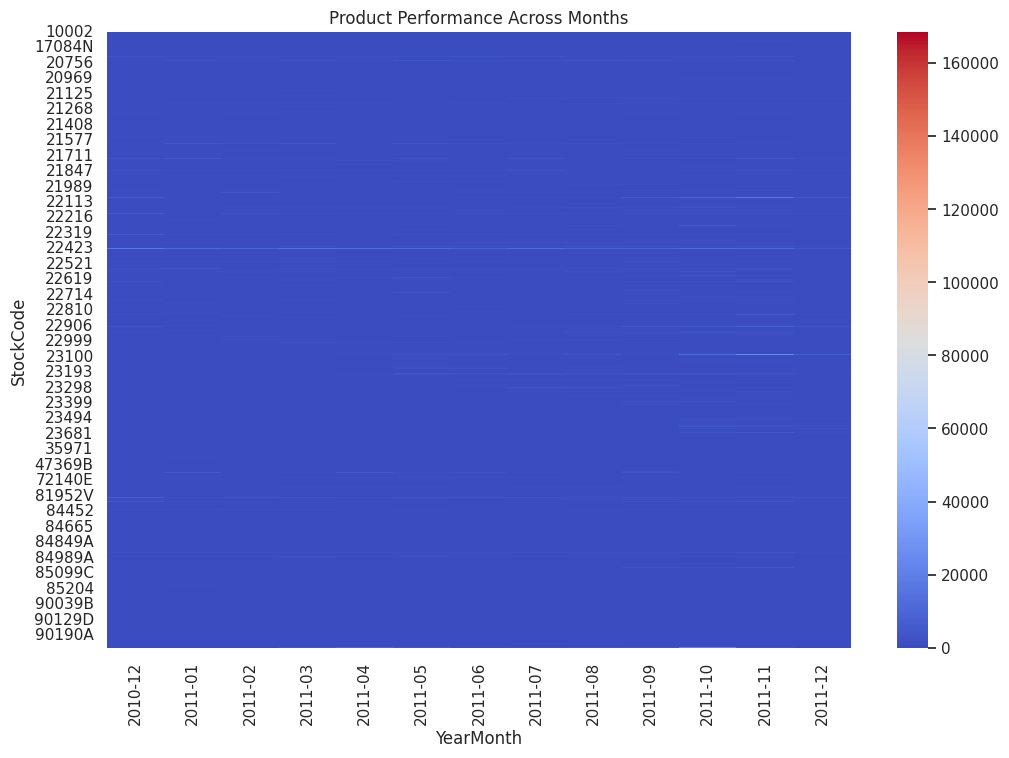

In [49]:
product_performance_by_month = df.groupby(['StockCode', 'YearMonth'])['TotalSales'].sum().unstack().fillna(0)

plt.figure(figsize=(12,8))
sns.heatmap(product_performance_by_month, cmap='coolwarm')
plt.title('Product Performance Across Months')
plt.show()
